In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.tsa.arima_model import ARMA
from sklearn.model_selection import train_test_split

In [71]:
train = pd.read_csv("input.txt", header=None, names = ["visitors"])

In [72]:
N,_ = train.shape
train["time"] = pd.to_datetime(range(1,N+1), unit='D',
                               origin=pd.Timestamp('2012-01-10'))

In [73]:
train = train.set_index("time")

In [74]:
train.tail()

,visitors
time,
2013-05-20,1341
2013-05-21,1679
2013-05-22,1823
2013-05-23,1845
2013-05-24,1921


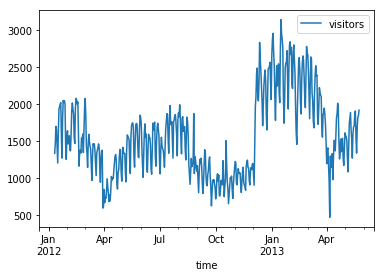

In [61]:
train.plot()

In [84]:
model = ARMA(endog=train.visitors[:], order=(1,2))

/home/robin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [85]:
model_fit = model.fit(disp=False)

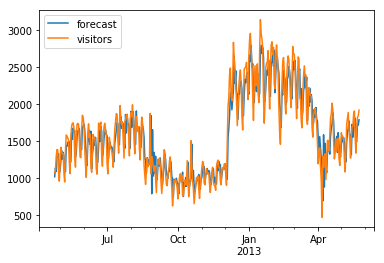

In [86]:
yhat = model_fit.plot_predict(start="2012-04-24",end="2013-05-24")

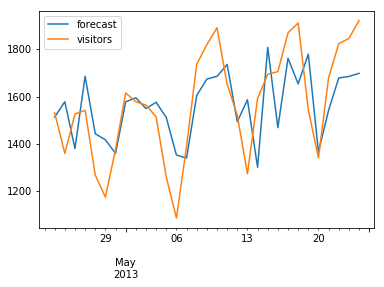

In [77]:
yhat

In [41]:
yhat

500    1750.489981
dtype: float64